In [98]:
%matplotlib inline
!pip install nengo
!pip install nengo_extras
import matplotlib.pyplot as plt

import nengo
import nengo_extras
from nengo.processes import Piecewise

#Check out these tutorials here
#https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
#https://www.nengo.ai/nengo-extras/examples/plot_spikes.html
from nengo_extras.plot_spikes import (
    cluster, merge, plot_spikes, preprocess_spikes, sample_by_variance)


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable


In [99]:
model = nengo.Network(label='Oscillator')
with model:
    # Create the ensemble for the oscillator
    population = nengo.Ensemble(200, dimensions=2)

In [100]:
with model:
    #YOUR CODE HERE 
    # Create an input signal
    input = nengo.Node(Piecewise({0: [1, 0], 0.1: [0, 0] }))
    # Connect the input signal to the neural ensemble
    nengo.Connection(input, population)
    # Create the a feedback connection Start with a value of [1, 1], [-1, 1] for the transform, see #https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
    # After trying [1, 1], [-1, 1] try making plots for all positive connections. What if they are all zeros? 
    transform = [[1, 1],[-1, 1]]
    nengo.Connection(population, population, transform=transform, synapse=0.1)

In [101]:
with model:
    #YOUR CODE HERE Create probes to monitor simulated neurons
    # Probe input signal
    input_probe = nengo.Probe(input, 'output')
    # Probe neurons using 'decoded_output' and a synapse value around 0.1, see #https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
    neuron_probe = nengo.Probe(population, 'decoded_output', synapse=0.1)
    # Probe spike data of neuron population, see #https://www.nengo.ai/nengo-extras/examples/plot_spikes.html
    spikes_probe = nengo.Probe(population.neurons, 'spikes')

In [102]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

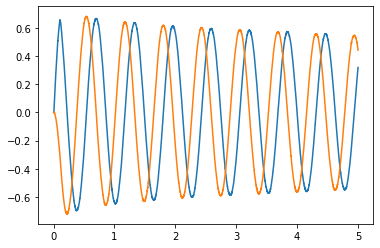

In [103]:
# YOUR CODE HERE
# plot the value of the decoded_output of neurons, see #https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
plt.figure()
plt.plot(sim.trange(), sim.data[neuron_probe])
# What happens if you rerun the simulation using only positive feedback connections?
# What happens if you rerun the simulation and the feedback connections are zero?

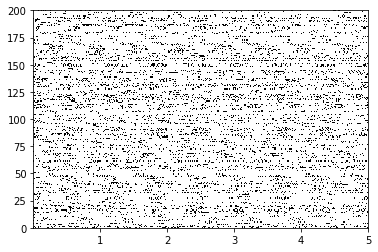

In [104]:
# YOUR CODE HERE
# plot the raster plot of the spiking neurons, see #https://www.nengo.ai/nengo-extras/examples/plot_spikes.html
plt.figure()
plot_spikes(sim.trange(), sim.data[spikes_probe])

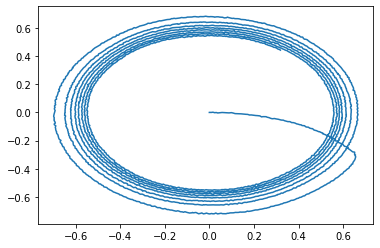

In [105]:
# YOUR CODE HERE
# plot the Phase plot for your neuron population, using the decoded_output of the neurons. This is a [n_time,2] vector
# Please look at #https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
data = sim.data[neuron_probe]
plt.figure()
plt.plot(data[:,0], data[:,1])

In [106]:
print("Here we see normal activity of left-right motion."
      "This is indicated by the oscillating nature of graphs 1 and 3")

Here we see normal activity of left-right motion.This is indicated by the oscillating nature of graphs 1 and 3
